<a href="https://colab.research.google.com/github/gnodking7/WDAnepv/blob/main/Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
In this example, we consider three different positive matrices that examplify the advantage of Acc_SK [1] algorithm over SK [2] algorithm. 

### What are Acc_SK and SK?
Acc_SK and SK share a common goal:

"Given a positive matrix $\mathbf{K}\in\mathbb{R}_+^{n\times m}$ obtain a matrix of the form $\mathbf{T}=\mathcal{D}(\mathbf{u})\mathbf{K}\mathcal{D}(\mathbf{v})\in\mathbb{R}_+^{n\times m}$ with desired row and column sums"

$\mathcal{D}(\mathbf{u})\in\mathbb{R}_+^{n\times n}$ and $\mathcal{D}(\mathbf{v})\in\mathbb{R}_+^{m\times m}$ represent diagonal matrices with diagonal elements $\mathbf{u}\in\mathbb{R}_+^n$ and $\mathbf{v}\in\mathbb{R}_+^m$, respectively.

In particular, we consider the resulting matrix $\mathbf{T}$ to have the row sum $\mathcal{1}/n$ and the columnn sum $\mathcal{1}/m$.

### Three matrices

\begin{align*}
    A =
    \begin{bmatrix}
    1 & \epsilon \\
    1 & 1
    \end{bmatrix},\quad
    B = 
    \begin{bmatrix}
    1 & \epsilon \\
    1 & 1 \\
    1 & 1
    \end{bmatrix},\quad
    C = [|\mathcal{N}(0,1)|]_{1\leq i\leq3,1\leq j\leq4}
\end{align*}

$C$ is a $3\times 4$ 
matrix whose element is an absolute value of number drawn 
from the standard normal distribution $\mathcal{N}(0,1)$. $\epsilon$ is set to be $\epsilon=10^{-8}$.

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [5]:
import WDA_subfunc as sub
import numpy as np
import matplotlib.pylab as pl

The row sum and column sum of resulting matrix by SK of matrix A are  [0.49504984 0.50495016]  and  [0.5 0.5]
The row sum and column sum of resulting matrix by Acc_SK of matrix A are  [0.5 0.5]  and  [0.50000144 0.49999856]


The row sum and column sum of resulting matrix by SK of matrix B are  [0.33332994 0.33333503 0.33333503]  and  [0.5 0.5]
The row sum and column sum of resulting matrix by Acc_SK of matrix B are  [0.33333333 0.33333333 0.33333333]  and  [0.50000103 0.49999897]


The row sum and column sum of resulting matrix by SK of matrix C are  [0.33333233 0.33333231 0.33333536]  and  [0.25 0.25 0.25 0.25]
The row sum and column sum of resulting matrix by Acc_SK of matrix C are  [0.33333333 0.33333333 0.33333333]  and  [0.25000002 0.24999998 0.2499998  0.2500002 ]





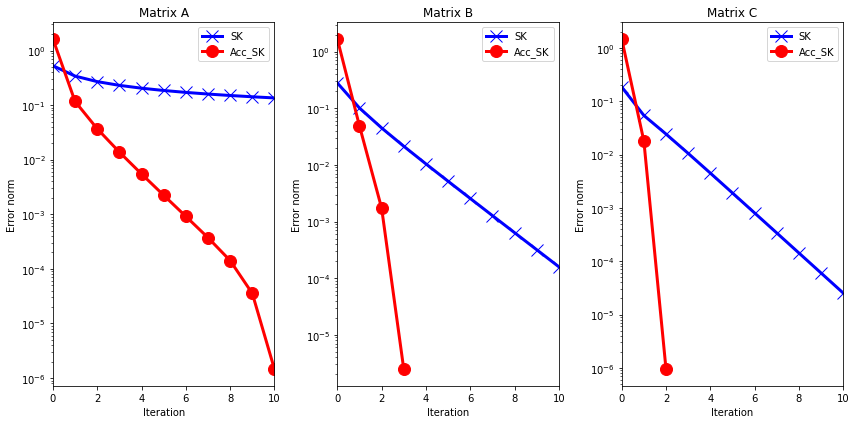

In [30]:
# Generate matrices
eps = 1e-8;
A = np.array([[1, eps], [1, 1]])
B = np.array([[1, eps], [1, 1], [1, 1]])
C = abs(np.random.normal(0, 1, size=(3, 4)))

# Compute errors of SK and Acc_SK
A_u1, A_v1, Err_A1 = sub.SK(A) # SK A
A_u2, A_v2, Err_A2 = sub.Acc_SK(A)  # Acc_SK A
B_u1, B_v1, Err_B1 = sub.SK(B) # SK A
B_u2, B_v2, Err_B2 = sub.Acc_SK(B)  # Acc_SK A
C_u1, C_v1, Err_C1 = sub.SK(C) # SK A
C_u2, C_v2, Err_C2 = sub.Acc_SK(C)  # Acc_SK A

# Check that desired matrix is found
T_A1 = np.matmul(np.diag(A_u1), np.matmul(A, np.diag(A_v1)))
T_A2 = np.matmul(np.diag(A_u2), np.matmul(A, np.diag(A_v2)))
T_B1 = np.matmul(np.diag(B_u1), np.matmul(B, np.diag(B_v1)))
T_B2 = np.matmul(np.diag(B_u2), np.matmul(B, np.diag(B_v2)))
T_C1 = np.matmul(np.diag(C_u1), np.matmul(C, np.diag(C_v1)))
T_C2 = np.matmul(np.diag(C_u2), np.matmul(C, np.diag(C_v2)))

print('The row sum and column sum of resulting matrix by SK of matrix A are ', np.sum(T_A1, 1), ' and ', np.sum(T_A1, 0))
print('The row sum and column sum of resulting matrix by Acc_SK of matrix A are ', np.sum(T_A2, 1), ' and ', np.sum(T_A2, 0))
print('\n')
print('The row sum and column sum of resulting matrix by SK of matrix B are ', np.sum(T_B1, 1), ' and ', np.sum(T_B1, 0))
print('The row sum and column sum of resulting matrix by Acc_SK of matrix B are ', np.sum(T_B2, 1), ' and ', np.sum(T_B2, 0))
print('\n')
print('The row sum and column sum of resulting matrix by SK of matrix C are ', np.sum(T_C1, 1), ' and ', np.sum(T_C1, 0))
print('The row sum and column sum of resulting matrix by Acc_SK of matrix C are ', np.sum(T_C2, 1), ' and ', np.sum(T_C2, 0))
print(2 * '\n')

# Plots errors
pl.figure(1, figsize=(12, 6))

pl.subplot(1, 3, 1)
pl.semilogy(Err_A1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_A2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.xlim([0, 10])
pl.title('Matrix A')

pl.subplot(1, 3, 2)
pl.semilogy(Err_B1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_B2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.xlim([0, 10])
pl.title('Matrix B')

pl.subplot(1, 3, 3)
pl.semilogy(Err_C1, 'bx-', linewidth=3, markersize=12, label='SK')
pl.semilogy(Err_C2, 'ro-', linewidth=3, markersize=12, label='Acc_SK')
pl.legend()
pl.xlabel('Iteration')
pl.ylabel('Error norm')
pl.xlim([0, 10])
pl.title('Matrix C')

pl.tight_layout()

# References

[1] A Aristodemo and L Gemignani. Accelerating the sinkhorn–knopp iteration by arnoldi-type
methods. Calcolo, 57(1):1–17, 2020.

[2] Richard Sinkhorn. Diagonal equivalence to matrices with prescribed row and column sums.
The American Mathematical Monthly, 74(4):402–405, 1967.